In [ ]:
# practise notebook

# write in exercise report how AI was used
# - how to make bins so that I can classify the data
# - searched how to create repository in git and be able to commit my work straight from csc noppe

In [15]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [2]:
# population grid data from hsy wfs

population_grid = geopandas.read_file(
    (
        "https://kartta.hsy.fi/geoserver/wfs"
        "?service=wfs"
        "&version=2.0.0"
        "&request=GetFeature"
        "&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2022"
        "&srsName=EPSG:3879"
    ),
)
population_grid.crs = "EPSG:3879"

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
# accessibility data from hsy as well (wfs)
# Kävelymatka asemalta 15 min, Juna- ja metroasemien ajallinen saavutettavuus kävellen 15min 

kavely = geopandas.read_file(
    (
        "https://kartta.hsy.fi/geoserver/wfs"
        "?service=wfs"
        "&version=2.0.0"
        "&request=GetFeature"
        "&typeName=asuminen_ja_maankaytto:kavely_15min"
        "&srsName=EPSG:3879"
    ),
)
kavely.crs = "EPSG:3879"



In [4]:
population_grid.crs == kavely_helsinkiregion.crs 

NameError: name 'kavely_helsinkiregion' is not defined

<Axes: >

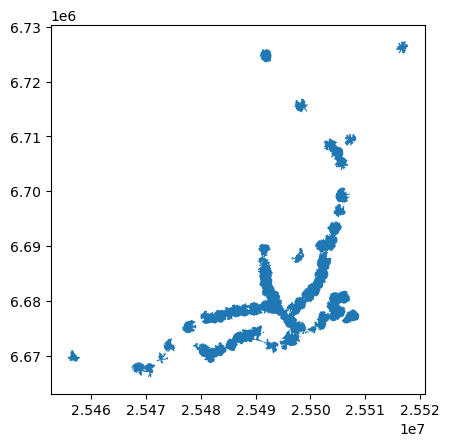

In [5]:
kavely.plot()

In [6]:
kavely.head()

,gml_id,asema,kulkumuoto,etaisyys,pinta_ala,geometry
0,kavely_15min.1,Aalto-yliopisto,Kävely,15 min,2474782.85,"MULTIPOLYGON (((25491309.638 6674236.759, 2549..."
1,kavely_15min.2,Ainola,Kävely,15 min,3635097.95,"POLYGON ((25504437.326 6704880.329, 25504436.3..."
2,kavely_15min.3,Aviapolis,Kävely,15 min,2253664.75,"POLYGON ((25496668.438 6687601.089, 25496658.6..."
3,kavely_15min.4,Espoo,Kävely,15 min,3920818.63,"POLYGON ((25481792.028 6675974.151, 25481789.5..."
4,kavely_15min.5,Espoonlahti,Kävely,15 min,4165287.91,"POLYGON ((25481716.285 6669855.541, 25481696.1..."


In [7]:
len(kavely)

83

In [8]:
kavely_helsinkiregion = geopandas.overlay(kavely, population_grid, how='intersection')

<Axes: >

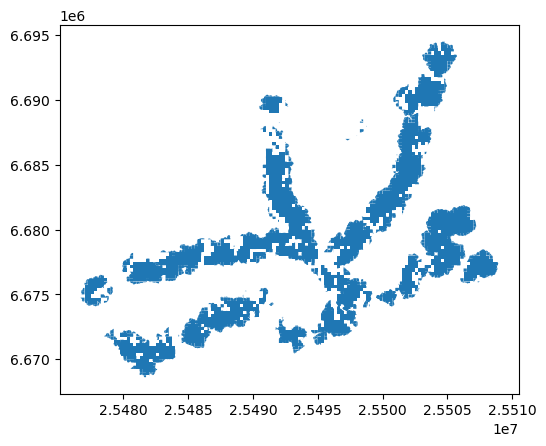

In [9]:
kavely_helsinkiregion.plot()


In [10]:
type(kavely_helsinkiregion)

geopandas.geodataframe.GeoDataFrame

In [11]:
kavely_helsinkiregion.head()

,gml_id_1,asema,kulkumuoto,etaisyys,pinta_ala,gml_id_2,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,kavely_15min.1,Aalto-yliopisto,Kävely,15 min,2474782.85,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,11440,580,38.38,54,50,137,114,66,36,51,51,21,"POLYGON ((25489215.277 6674925.203, 25489227.1..."
1,kavely_15min.1,Aalto-yliopisto,Kävely,15 min,2474782.85,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,11600,6,40.50,99,99,99,99,99,99,99,99,99,"POLYGON ((25489374.913 6675254.442, 25489400.8..."
2,kavely_15min.1,Aalto-yliopisto,Kävely,15 min,2474782.85,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,11603,273,33.85,27,37,16,41,34,39,42,23,14,"MULTIPOLYGON (((25489390.806 6674519.978, 2548..."
3,kavely_15min.1,Aalto-yliopisto,Kävely,15 min,2474782.85,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,11604,74,45.80,99,99,99,99,99,99,99,99,99,"POLYGON ((25489375.856 6674262.886, 25489374.3..."
4,kavely_15min.1,Aalto-yliopisto,Kävely,15 min,2474782.85,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,11605,90,42.03,99,99,99,99,99,99,99,99,99,"POLYGON ((25489498.287 6674127.717, 25489470.6..."


<Axes: >

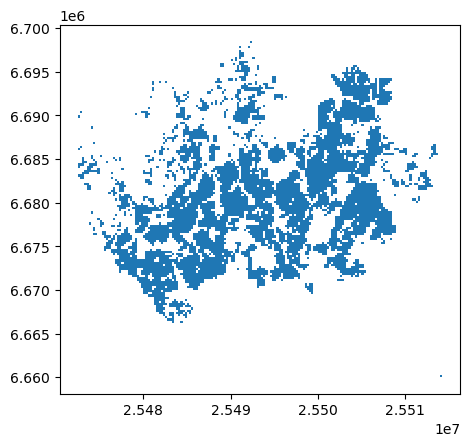

In [12]:
population_grid.plot()

In [13]:
population_grid['asukkaita'].min()

5

In [14]:
top5 = population_grid['asukkaita'].nlargest(5)

In [15]:
print(top5)

5837    31470
3586     2243
3547     2075
3287     1987
3448     1980
Name: asukkaita, dtype: int64


In [16]:
population_grid.head()

,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,688,5,50.60,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6689749.005, 25472499.9..."
1,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,703,5,51.40,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
2,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,710,8,44.50,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
3,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,711,7,64.14,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
4,Vaestotietoruudukko_2022.fid-69b905c6_196d38d8...,715,10,45.20,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."


In [17]:
# creating bins for population data, as I want to choose my own colours

bins = [0, 50, 300, 1000, 2000, np.inf]
labels = ["0–49", "50–299", "300–999", "1000–1999", "2000-"]

# adding a new column for the bins, using 'asukkaita' column and the bins I just defined + labels that show which class
population_grid["population_bin"] = pandas.cut(population_grid["asukkaita"], bins=bins, labels=labels, include_lowest=True)

In [18]:
# Next I will choose colours for different classes

colours = {
    "0–49": "#ffe6f4",
    "50–299": "#ffb3dd",
    "300–999": "#ff99d1",
    "1000–1999": "#ff66ba",
    "2000-": "#ff1a98"
}

In [19]:
import contextily

In [20]:
bounds = population_grid.total_bounds
print(bounds)

[25472499.99549953  6659998.998      25514249.99774949  6698499.005     ]


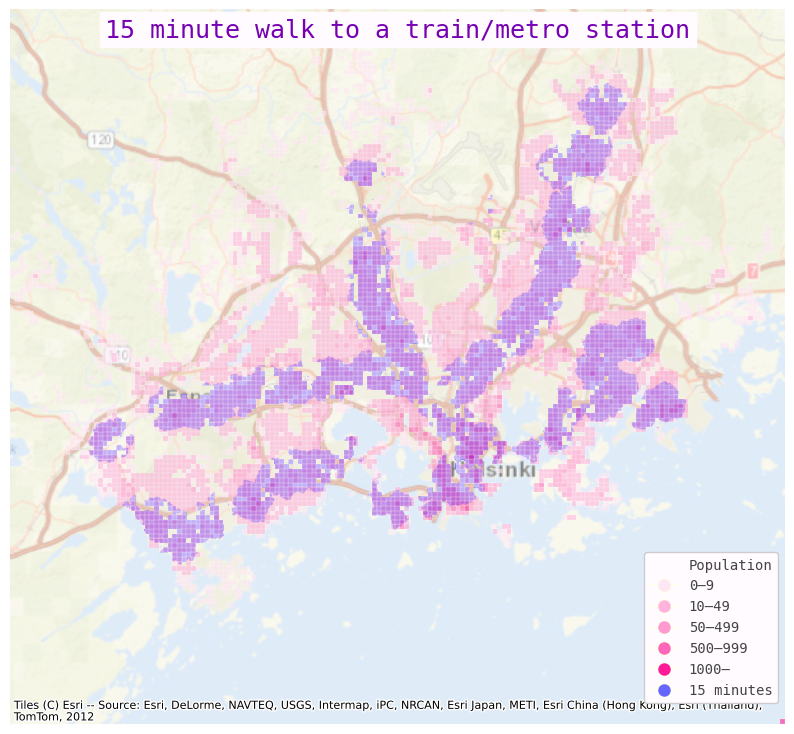

In [21]:
# creating the plot
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor("#eeeced")


ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Plotting the bins one by one
for label in labels: # looping through the bins
    subset = population_grid[population_grid["population_bin"] == label]
    subset.plot(ax=ax, color=colours[label], label=label, edgecolor="white", linewidth=0.2, alpha=0.6, zorder=2)

# adding data about walking 
kavely_helsinkiregion.plot(ax=ax, color='#6666ff', alpha=1, zorder=1)

# adding a basemap
contextily.add_basemap(ax, source=contextily.providers.Esri.WorldStreetMap, crs=population_grid.crs, alpha=0.5)

# Remove axis
ax.axis('off')

# set title
ax.set_title("15 minute walk to a train/metro station", loc='center', y=0.95, color='#7700b3', fontname='monospace', 
             fontsize=18, fontweight='book', backgroundcolor='#FFFBFF')



# Text and marker size
markersize = 10
fontsize = 10

# Legend
legend_elements = [Line2D([0], [0], alpha=0, label='Population'),
                   Line2D([0], [0], marker='o', color="#feffef", label='0–9',
                          markerfacecolor="#ffe6f4", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='10–49',
                          markerfacecolor="#ffb3dd", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='50–499',
                          markerfacecolor="#ff99d1", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='500–999',
                          markerfacecolor="#ff66ba", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='1000–',
                          markerfacecolor="#ff1a98", markersize=markersize),
                   Line2D ([0], [0], marker='o', color='#feffef', label='15 minutes', 
                          markerfacecolor='#6666ff', markersize=markersize)]


l = ax.legend(handles=legend_elements, frameon=True, ncol=1,
              facecolor='#FFFBFF', framealpha=1,
              bbox_to_anchor=(1, 0.25), fontsize=fontsize, prop={'family': "monospace", 'size': fontsize})

for text in l.get_texts():
    text.set_color("#444444")



# bins
# legend frame 
# title size, placement, font



From geopython course, how to add multiple layers when plotting

import matplotlib.pyplot as plt
ax = accessibility_grid.plot(
    figsize=(12, 8),

    column="pt_r_t",
    scheme="quantiles",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8
)

metro.plot(
    ax=ax,
    color="orange",
    linewidth=2.5
)

roads.plot(
    ax=ax,
    color="grey",
    linewidth=0.8
)

minx, miny, maxx, maxy = accessibility_grid.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)



# WFS-rajapinta
url = "https://paituli.csc.fi/geoserver/paituli/wfs"

# Ladataan haluttu kerros, esim. CORINE 2018 (voit vaihtaa 'typename' tarpeen mukaan)
layer = "paituli:CORINE2018_20m"

# Parametrit
params = {
    "service": "WFS",
    "version": "2.0.0",
    "request": "GetFeature",
    "typename": layer,
    "outputFormat": "application/json"  # GeoJSON-muoto
}

# Ladataan data GeoDataFrameen
gdf = gpd.read_file(url, params=params)


# https://paituli.csc.fi/geoserver/paituli/wfs?
# paituli:mml_hallinto_2018_100kMML


url = "https://paituli.csc.fi/geoserver/paituli/wfs"
layer = "paituli:mml_hallinto_2018_100kMML"
params = {
    "service": "WFS",
    "version": "2.0.0",
    "request": "GetFeature",
    "typename": layer,
    "outputFormat": "application/json"
}

# WFS:stä suoraan GeoDataFrameen
gdf = geopandas.read_file(url, params=params)

import geopandas as gpd

url = "https://paituli.csc.fi/geoserver/paituli/wfs"

params = {
    "service": "WFS",
    "version": "2.0.0",
    "request": "GetFeature",
    "typename": "paituli:mml_hallinto_2018_100kMML",
    "outputFormat": "application/json",
    "bbox": "254000,6670000,256000,6672000,EPSG:3067"  # pieni alue
}



# Yritetään hakea data
try:
    gdf = gpd.read_file(url, params=params)
    print(gdf.head())
except Exception as e:
    print("Virhe haettaessa dataa:", e)


hallinto = geopandas.read_file(
    (
        "https://paituli.csc.fi/geoserver/paituli/wfs"
        "?service=wfs"
        "&version=2.0.0"
        "&request=GetFeature"
        "&typeName=paituli:mml_hallinto_2018_100kMML"
        "&srsName=EPSG:3879"
    ),
)
hallinto.crs = "EPSG:3879"

In [ ]:
# Part 2

In [2]:
import pathlib
import geopandas
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data" 

municipal = geopandas.read_file(DATA_DIRECTORY / "maakunnat_2024_milj.shp")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<Axes: >

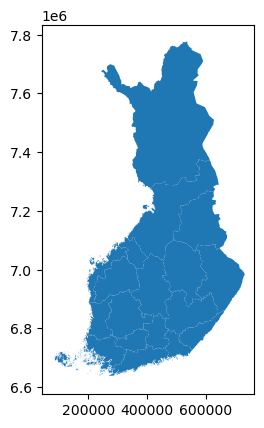

In [3]:
municipal.plot()

In [4]:
municipal.head(15)

,GML_ID,NATCODE,NAMEFIN,NAMESWE,geometry
0,1601210001,01,Uusimaa,Nyland,"MULTIPOLYGON (((273059.511 6633517.006, 273205..."
1,1601210009,06,Pirkanmaa,Birkaland,"POLYGON ((354164.609 6792565.666, 352746.008 6..."
2,1601210021,12,Pohjois-Karjala,Norra Karelen,"POLYGON ((647019.938 7072707.548, 647875.536 7..."
3,1601210033,18,Kainuu,Kajanaland,"POLYGON ((626655.494 7255813.466, 626655.500 7..."
4,1601210037,21,Ahvenanmaan maakunta,Landskapet Åland,"MULTIPOLYGON (((126076.120 6667389.301, 125939..."
5,1601210025,14,Etelä-Pohjanmaa,Södra Österbotten,"POLYGON ((310933.466 6926894.948, 307589.854 6..."
6,1601210015,09,Etelä-Karjala,Södra Karelen,"POLYGON ((665092.399 6861461.194, 665021.389 6..."
7,1601210013,08,Kymenlaakso,Kymmenedalen,"MULTIPOLYGON (((516848.870 6683247.843, 517391..."
8,1601210005,04,Satakunta,Satakunta,"MULTIPOLYGON (((197697.962 6797130.633, 197947..."
9,1601210031,17,Pohjois-Pohjanmaa,Norra Österbotten,"MULTIPOLYGON (((330560.208 7111497.308, 330633..."


In [5]:
# clipping raretrees data with a municipality
# choosing own colours for values


# Read file using gpd.read_file()
rare_trees = geopandas.read_file(DATA_DIRECTORY / "puulajit_2015.shp")

In [6]:
pohjois_karjala = municipal[municipal['NAMEFIN'] == 'Pohjois-Karjala']

<Axes: >

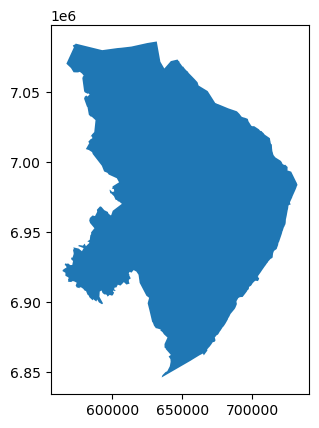

In [7]:
pohjois_karjala.plot()

In [8]:
trees_clipped = rare_trees.clip(pohjois_karjala)


<Axes: >

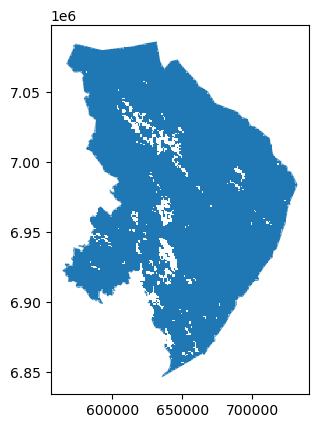

In [9]:
trees_clipped.plot()

In [10]:
type(trees_clipped)

geopandas.geodataframe.GeoDataFrame

In [23]:
trees_clipped.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
municipal.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
trees_clipped.head()

,leku_ha,kataja_ha,muuhavu_ha,rako_ha,hiko_ha,haapa_ha,hleppa_ha,tleppa_ha,raita_ha,pihlaja_ha,tammi_ha,muulehti_h,muulp_tamm,muuhavu_lk,Metsat_maa,geometry
241894,0,0,0,7,18,2,2,1,0,0,0,0,0,0,98,"POLYGON ((581000.000 6908000.000, 581000.000 6..."
241406,0,0,0,8,23,3,3,1,0,1,0,0,0,0,93,"POLYGON ((580000.000 6909000.000, 580000.000 6..."
240913,0,0,0,9,18,3,1,0,0,0,0,0,0,0,97,"POLYGON ((576000.000 6910000.000, 576000.000 6..."
240914,0,0,0,7,19,2,1,0,0,0,0,0,0,0,99,"POLYGON ((576000.000 6910000.000, 576705.516 6..."
240427,0,0,0,9,17,2,3,0,0,0,0,0,0,0,93,"POLYGON ((577000.000 6911000.000, 578000.000 6..."


<Axes: >

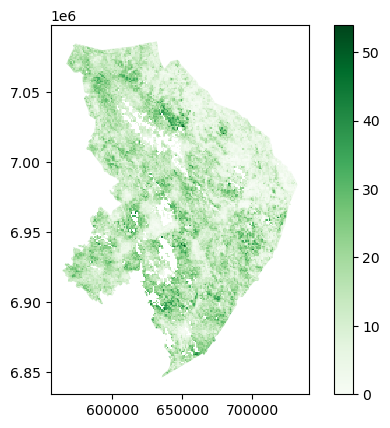

In [12]:
trees_clipped.plot(column="hiko_ha", cmap='Greens', legend=True)

In [13]:
trees_clipped['hiko_ha'].min()

0

In [16]:
# creating bins
bins2 = [0, 1, 5, 20, 40, np.inf]
labels2 = ["0", "1–4", "5–19", "20–39", "40–"]

# adding a new column for the bins, using 'hiko_ha' column and the bins I just defined + labels that show which class
trees_clipped["bins"] = pandas.cut(trees_clipped["hiko_ha"], bins=bins2, labels=labels2, include_lowest=True)

In [17]:
tree_colours = {
    "0": "#9DA9A5",
    "1–4": "#A3C461",
    "5–19": "#64A43B",
    "20–39": "#49782B",
    "40–": "#243C15"
}

In [18]:
trees_clipped.head()

,leku_ha,kataja_ha,muuhavu_ha,rako_ha,hiko_ha,haapa_ha,hleppa_ha,tleppa_ha,raita_ha,pihlaja_ha,tammi_ha,muulehti_h,muulp_tamm,muuhavu_lk,Metsat_maa,geometry,bins
241894,0,0,0,7,18,2,2,1,0,0,0,0,0,0,98,"POLYGON ((581000.000 6908000.000, 581000.000 6...",5–19
241406,0,0,0,8,23,3,3,1,0,1,0,0,0,0,93,"POLYGON ((580000.000 6909000.000, 580000.000 6...",20–39
240913,0,0,0,9,18,3,1,0,0,0,0,0,0,0,97,"POLYGON ((576000.000 6910000.000, 576000.000 6...",5–19
240914,0,0,0,7,19,2,1,0,0,0,0,0,0,0,99,"POLYGON ((576000.000 6910000.000, 576705.516 6...",5–19
240427,0,0,0,9,17,2,3,0,0,0,0,0,0,0,93,"POLYGON ((577000.000 6911000.000, 578000.000 6...",5–19


In [19]:
treebounds = trees_clipped.total_bounds
print(treebounds)

[ 564286.912      6845880.073       732461.34192178 7086294.3       ]


In [20]:
top5trees = trees_clipped['hiko_ha'].nlargest(5)

In [21]:
print(top5trees)

225565    54
185019    50
182574    50
248173    47
213778    47
Name: hiko_ha, dtype: int64


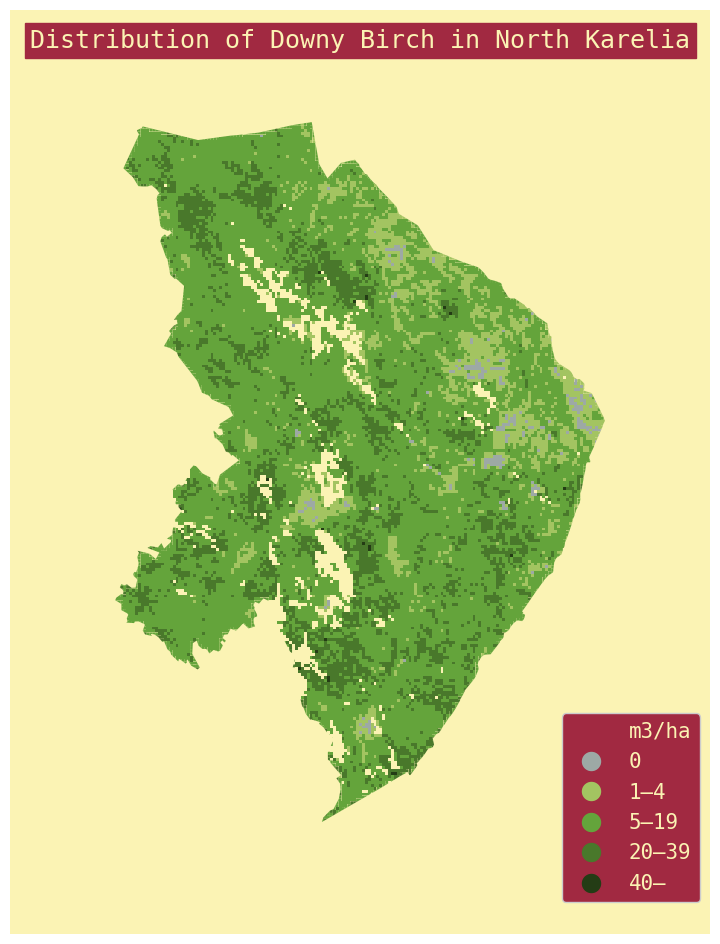

In [22]:
# creating the plot
from matplotlib.lines import Line2D

fig2, ax2 = plt.subplots(figsize=(12, 12))
ax2.set_facecolor("#FBF3B4")
#fig.patch.set_facecolor('red')

#ax.set_xlim(bounds[0], bounds[2])
#ax.set_ylim(bounds[1], bounds[3])

# Plotting the bins one by one
for label in labels2: # looping through the bins
    subset = trees_clipped[trees_clipped["bins"] == label]
    subset.plot(ax=ax2, color=tree_colours[label], label=label, edgecolor="white", linewidth=0, alpha=1, zorder=2)
    


# Remove axis
ax2.set_xticks([])
ax2.set_yticks([])
for spine in ax2.spines.values():
    spine.set_visible(False)


# Hae alkuperäiset raja-arvot
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()

# Lisää marginaalia esim. 20 %
x_margin = (xmax - xmin) * 0.15
y_margin = (ymax - ymin) * 0.10

# Aseta uudet rajat
ax2.set_xlim(xmin - x_margin, xmax + x_margin)
ax2.set_ylim(ymin - y_margin, ymax + y_margin)



# set title
ax2.set_title("Distribution of Downy Birch in North Karelia", loc='center', y=0.95, color='#FBF3B4', fontname='monospace', 
             fontsize=18, fontweight='book', backgroundcolor='#A12941')



# Text and marker size
markersize = 15
fontsize = 15

# Legend
legend_elements = [Line2D([0], [0], alpha=0, label='m3/ha'),
                   Line2D([0], [0], marker='o', color="#A12941", label='0',
                          markerfacecolor="#9DA9A5", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#A12941", label='1–4',
                          markerfacecolor="#A3C461", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#A12941", label='5–19',
                          markerfacecolor="#64A43B", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#A12941", label='20–39',
                          markerfacecolor="#49782B", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#A12941", label='40–',
                          markerfacecolor="#243C15", markersize=markersize)]


l = ax2.legend(handles=legend_elements, frameon=True, ncol=1,
              facecolor='#A12941', framealpha=1,
              bbox_to_anchor=(1, 0.25), fontsize=fontsize, prop={'family': "monospace", 'size': fontsize})

for text in l.get_texts():
    text.set_color("#FBF3B4")



fig2.savefig("NK_downy_birch.png", dpi=300, bbox_inches='tight', format="png", facecolor=ax2.get_facecolor(), transparent=True)